<a href="https://colab.research.google.com/github/Colsai/Coursera-Data-Science-Practice/blob/master/Old%20Projects/Covid_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Data taken from NYT Github

#Datetime for Time Series
import datetime

#Import Packages for Data
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
sns.set(style="ticks")

#Load Matplotlib for Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

#Import Plotly
import plotly
import plotly.graph_objs as go
plt.style.use('seaborn-white')


In [4]:
#Cases by day from beginning (US)
usa_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
us_df = pd.read_csv(usa_url,index_col=0,parse_dates=[0])

counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
counties_df = pd.read_csv(counties_url,index_col=0,parse_dates=[0])

states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states_df = pd.read_csv(states_url, index_col=0,parse_dates=[0])

In [5]:
us_df.head()
us_df.dtypes

cases     int64
deaths    int64
dtype: object

In [6]:
from sklearn import preprocessing

cov_cases = us_df['cases']
cov_deaths = us_df['deaths']

cases_nom = preprocessing.scale(cov_cases)
cdeaths_nom = preprocessing.scale(cov_deaths)

In [7]:
cases_nom

array([-1.03733246e+00, -1.03733246e+00, -1.03733246e+00, -1.03733207e+00,
       -1.03733168e+00, -1.03733090e+00, -1.03733090e+00, -1.03733090e+00,
       -1.03733090e+00, -1.03733051e+00, -1.03733011e+00, -1.03732972e+00,
       -1.03732855e+00, -1.03732855e+00, -1.03732855e+00, -1.03732816e+00,
       -1.03732816e+00, -1.03732816e+00, -1.03732816e+00, -1.03732816e+00,
       -1.03732777e+00, -1.03732777e+00, -1.03732738e+00, -1.03732699e+00,
       -1.03732699e+00, -1.03732699e+00, -1.03732699e+00, -1.03732308e+00,
       -1.03732308e+00, -1.03732308e+00, -1.03732229e+00, -1.03732112e+00,
       -1.03732112e+00, -1.03732112e+00, -1.03731604e+00, -1.03731526e+00,
       -1.03730939e+00, -1.03730939e+00, -1.03730744e+00, -1.03730548e+00,
       -1.03729844e+00, -1.03729219e+00, -1.03728397e+00, -1.03726990e+00,
       -1.03724370e+00, -1.03721125e+00, -1.03716550e+00, -1.03711897e+00,
       -1.03704037e+00, -1.03693480e+00, -1.03683900e+00, -1.03668064e+00,
       -1.03646323e+00, -

In [8]:
cov_cases

date
2020-01-21          1
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          3
               ...   
2020-10-09    7698203
2020-10-10    7749789
2020-10-11    7794555
2020-10-12    7840482
2020-10-13    7894994
Name: cases, Length: 267, dtype: int64

In [9]:
#Quick Estimator:

#Ask the user how many days back that they want to look. CANNOT DO 0!
i=int(input(("Calculate Rolling Average i/+7/+30 Avg/# of days? ")))
m=int(input("What is the likely R:C case multplier (est. 5:40)"))

#True Case Multiplier. This can be changed with whatever the true number is

#-1 to i cases in last i days/deaths
ra_cases = round((us_df['cases'][-1]-us_df['cases'][-i])/(i-1),1)
ra_deaths = round((us_df['deaths'][-1]-us_df['deaths'][-i])/(i-1),1)
ra_asdeathrate = round((ra_deaths/ra_cases)*100,3)
ra_astruedr = round((ra_deaths/(ra_cases*m))*100,3)

#i to -i-7 (one week after) cases/deaths
ra_wk_cases = round((us_df['cases'][-i]-us_df['cases'][-i-7])/7,1)
ra_wk_deaths = round((us_df['deaths'][-i]-us_df['deaths'][-i-7])/7,1)
ra_wk_asdeathrate = round((ra_wk_deaths/ra_wk_cases)*100,3)
ra_wk_astruedr = round((ra_wk_deaths/(ra_wk_cases*m))*100,3)

#-i to -i-30 (one month before) cases/deaths
ra_mo_cases = round((us_df['cases'][-i]-us_df['cases'][-i-30])/30,1)
ra_mo_deaths = round((us_df['deaths'][-i]-us_df['deaths'][-i-30])/30,1)
ra_mo_asdeathrate = round((ra_mo_deaths/ra_mo_cases)*100,3)
ra_mo_astruedr = round((ra_mo_deaths/(ra_mo_cases*m))*100,3)

#Displaying information about the cases
print(f"\nCovid Confirmed/Deaths/Estimated from the past {i} days...")
print(f"{abs(i)} Day Average Cases = {ra_cases} and {ra_cases*m} crude real cases/ Average Deaths = {ra_deaths} over the last {i} days/")
print(f"About {ra_asdeathrate}% Confirmed Death Rate, possibly {ra_astruedr}% Death Rate, at {m}x R:C.")

print(f"\n{i} + 7 = {abs(-i-7)} Day Average Cases = {ra_wk_cases} and {ra_wk_cases*m} crude real cases / Average Deaths = {ra_wk_deaths} over the last {i} days/")
print(f"About {ra_wk_asdeathrate}% Confirmed Death Rate, possibly {ra_wk_astruedr}% Death Rate, at {m}x R:C.")

print(f"\n{i} + 30 = {abs(-i-30)} Day Average Cases = {ra_mo_cases} and {ra_mo_cases*m} crude real cases / Average Deaths = {ra_mo_deaths} over the last {i} days/")
print(f"About {ra_mo_asdeathrate}% Confirmed Death Rate, possibly {ra_mo_astruedr}% Death Rate, at {m}x R:C.")

print(f"\nThat's {round(ra_astruedr/.1,3)} times or {round(ra_wk_astruedr/.1,3)} times or {round(ra_mo_astruedr/.1,3)} times more deadly than the flu (at .1% mortality/10 year est)")

Calculate Rolling Average i/+7/+30 Avg/# of days? 5
What is the likely R:C case multplier (est. 5:40)5

Covid Confirmed/Deaths/Estimated from the past 5 days...
5 Day Average Cases = 49197.8 and 245989.0 crude real cases/ Average Deaths = 547.0 over the last 5 days/
About 1.112% Confirmed Death Rate, possibly 0.222% Death Rate, at 5x R:C.

5 + 7 = 12 Day Average Cases = 47955.1 and 239775.5 crude real cases / Average Deaths = 718.4 over the last 5 days/
About 1.498% Confirmed Death Rate, possibly 0.3% Death Rate, at 5x R:C.

5 + 30 = 35 Day Average Cases = 43935.5 and 219677.5 crude real cases / Average Deaths = 762.6 over the last 5 days/
About 1.736% Confirmed Death Rate, possibly 0.347% Death Rate, at 5x R:C.

That's 2.22 times or 3.0 times or 3.47 times more deadly than the flu (at .1% mortality/10 year est)


(0.0, 3000000.0)

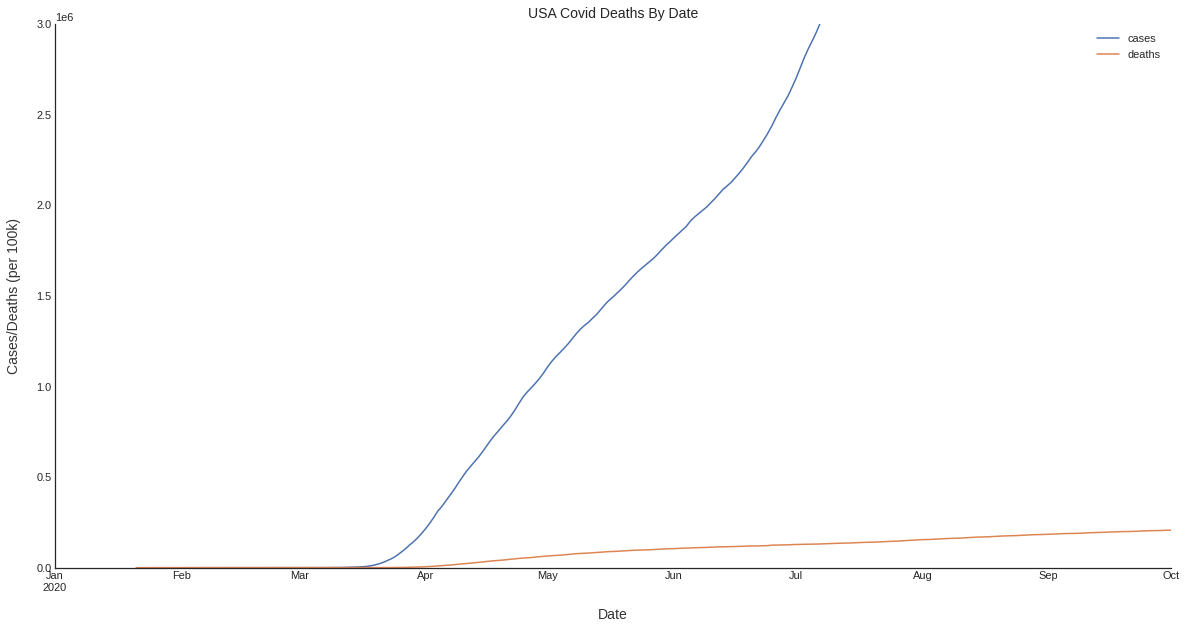

In [10]:
712542#Sets the Plot
ax = us_df.plot(kind = "line", figsize=(20,10))

#Graphics Stuff
ax.set_xlabel("Date", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Cases/Deaths (per 100k)", labelpad=15, fontsize=14, color="#333533");
ax.set_title("USA Covid Deaths By Date", fontsize = 14)

#Invisible Spines
ax.spines["top"].set_visible(False)     
ax.spines["right"].set_visible(False)       

#Modifies the Datetime to look at specific times
plt.xlim([datetime.date(2020, 1, 1), datetime.date(2020, 10, 1)])
plt.ylim(0, 3e6)       

Text(0.5, 1.0, 'Covid Cases to deaths')

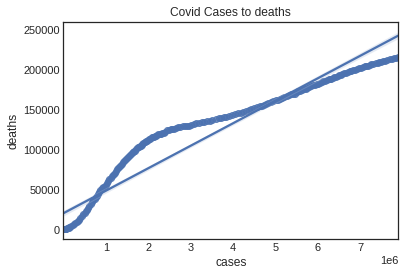

In [11]:
#Have cases meant more deaths?
ax = sns.regplot(x='cases', y='deaths',data=us_df, fit_reg=True) 
ax.set_title("Covid Cases to deaths")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


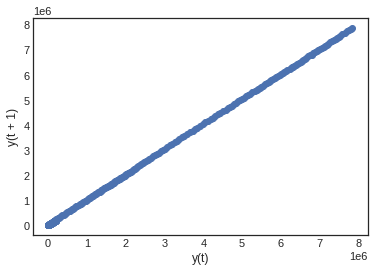

In [12]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(us_df)
pyplot.show()

In [ ]:
#counties_df.head()

counties = counties_df[['state','cases']]
ax = counties.plot(kind='bar',x='state', y='cases')

In [ ]:
counties_df.dtypes

In [ ]:
#
grouped_counties = counties_df.groupby(by='state')

grouped_counties.plot(kind='hist',x='state',y='deaths')

In [ ]:
us_deaths= us_df['deaths']
count
num_back = i

while num_back
    us_deaths[-1] 
    num_back += 1
      if num_back >=:
    

In [ ]:
i=-1

while -i > 10:
    print(us_deaths[i])
i -= 1

In [ ]:
counties_df['county']